In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_path1 = '/Users/tigershao/Dropbox (UFL)/Forum Slides Making Project/data/admin data/all_year/hedis_star_all.csv'
file_path2 = '/Users/tigershao/Dropbox (UFL)/Forum Slides Making Project/data/admin data/all_year/hedis_sk_all.csv'
file_path3 = '/Users/tigershao/Dropbox (UFL)/Forum Slides Making Project/data/admin data/all_year/hedis_sp_all.csv'
file_path4 = '/Users/tigershao/Dropbox (UFL)/Forum Slides Making Project/data/admin data/all_year/national_level_all.csv'
hedis_star_all = pd.read_csv(file_path1)
hedis_sk_all = pd.read_csv(file_path2)
hedis_sp_all = pd.read_csv(file_path3)
national_level_all = pd.read_csv(file_path4)

In [134]:
def get_color_for_rate(rate, year, national_data):
    # Round the rate to have no digit
    rate = round(rate)
    
    percentiles = national_data.loc[national_data['year'] == year, ['X10thPercentile', 'X25thPercentile', 'X50thPercentile', 'X75thPercentile', 'X90thPercentile']]
    if rate < percentiles['X10thPercentile'].values[0]:
        return '#C00000'
    elif rate < percentiles['X25thPercentile'].values[0]:
        return '#E26B09'
    elif rate < percentiles['X50thPercentile'].values[0]:
        return '#FFC100'
    elif rate < percentiles['X75thPercentile'].values[0]:
        return '#FFFF00'
    elif rate < percentiles['X90thPercentile'].values[0]:
        return '#8DB4E2'
    elif rate >= percentiles['X90thPercentile'].values[0]:
        return '#8DB4E2'
    else:
        return 'grey'
    


######

def plot_state_vs_national_modified(state_data, national_data, y_lim_lower, y_lim_upper, y_note, title, offset):
    state_data['year'] = state_data['year'].astype(str)
    national_data['year'] = national_data['year'].astype(str)

    # Set global font size
    plt.rcParams.update({'font.size': 25})

    # Adjust plot scale size, and panel color
    plt.figure(figsize=(16, 7), facecolor='white')

    # Determine the color for each state rate based on the national percentiles
    colors = []
    for index, row in state_data.iterrows():
        color = get_color_for_rate(row['rate'], row['year'], national_data)
        colors.append(color)
    state_data['color'] = colors

    # Plot the state data as bars with the assigned color
    barplot = sns.barplot(data=state_data, x='year', y='rate', palette=state_data['color'], ci=None)
    
    # Add bar labels for each bar
    for bar in barplot.patches:
        barplot.annotate(format(bar.get_height(), '.0f'),
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='bottom',
                         textcoords="offset points",
                         xytext=(0,5),
                         fontsize=25)

    # Plot the national percentile data as lines
    sns.lineplot(data=national_data, x='year', y='X50thPercentile', marker='o', color='#8DB4E2', label='', linewidth=4.5)
    sns.lineplot(data=national_data, x='year', y='X25thPercentile', marker='o', color='#FFC100', label='', linewidth=4.5)
    sns.lineplot(data=national_data, x='year', y='X10thPercentile', marker='o', color='#C00000', label='', linewidth=4.5)
    
    # Add text labels for the 10th, 25th, and 50th percentiles
    # Example for adding labels, adjust 'year' and 'percentile_value' as needed
    #plt.text('2022', national_data['X10thPercentile'].min(), ' NCQA 10th Percentile', fontsize=25, color='#C00000')
    #plt.text('2022', national_data['X25thPercentile'].min(), ' NCQA 25th Percentile', fontsize=25, color='#FFC100')
    #plt.text('2022', national_data['X50thPercentile'].min(), ' NCQA 50th Percentile', fontsize=25, color='#8DB4E2')
    
    plt.text(4.4, national_data['X10thPercentile'].min()+offset, ' NCQA 10th Percentile', fontsize=25, color='#C00000')
    plt.text(4.4, national_data['X25thPercentile'].min()+offset, ' NCQA 25th Percentile', fontsize=25, color='#FFC100')
    plt.text(4.4, national_data['X50thPercentile'].min()+offset, ' NCQA 50th Percentile', fontsize=25, color='#8DB4E2')
    

    
    # Set additional plot parameters
    plt.title(title)
    plt.xlabel('')
    plt.ylabel(y_note)
    plt.grid(False)
    plt.tight_layout()
    plt.ylim(y_lim_lower, y_lim_upper)
    
    sns.despine()
    
    plt.show()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

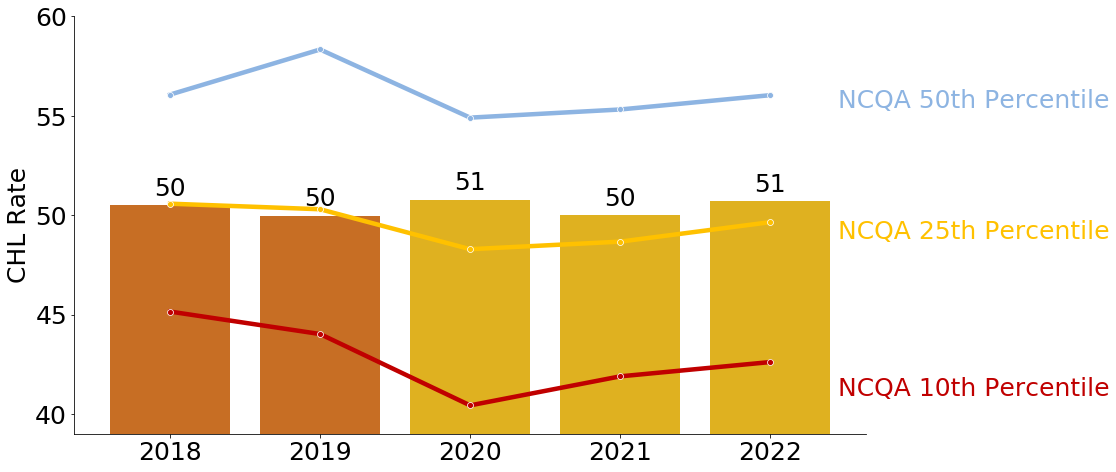

In [123]:
##########################
#'CHL from 2018 to 2022'
##########################

filtered_data_chl = hedis_star_all[(hedis_star_all['MeasureNameAbbreviation'] == 'CHL') &
                               (hedis_star_all['PopulationName'] == 'ALL') &
                               (hedis_star_all['SubmeasureName'] == 'Total')]

filtered_national_chl = national_level_all[
    (national_level_all['MeasureNameAbbreviation'] == 'CHL') &
    (national_level_all['MeasureName'].str.contains('Chlamydia Screening in Women.*Total', case=False, na=False))
]

filtered_data_chl['year'] = filtered_data_chl['year'].astype(str)
filtered_national_chl['year'] = filtered_national_chl['year'].astype(str)

plot_state_vs_national_modified(filtered_data_chl, filtered_national_chl, 39, 60, "CHL Rate", "", 0.5)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

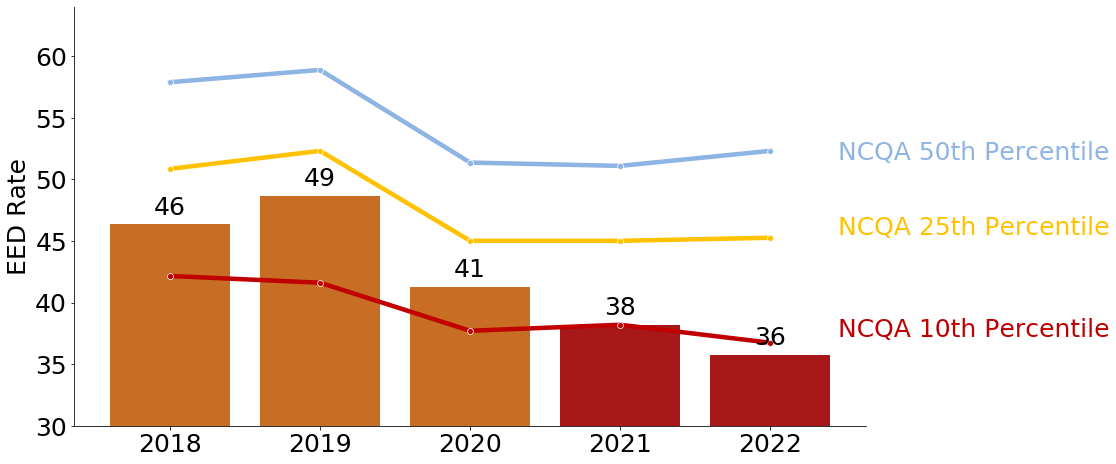

,Measurename,SubmeasureName,PopulationName,PopulationName1,Numer,Denom,rate,PlanCodes,MeasureNameAbbreviation,year,color
7373,Comp Diab Non MCR 19 (CDC19B),Non-Medicare Eye Exam,ALL,ALL,3593,7753,46.34,ALL,CDC,2018,#E26B09
28765,Comp Diab Non MCR 20 (CDC20B),Non-Medicare Eye Exam,ALL,ALL,3809,7824,48.68,ALL,CDC,2019,#E26B09
52297,Comp Diab N MCR MY20 (CDCMY20B),Non-Medicare Eye Exam,ALL,ALL,6505,15750,41.30,ALL,CDC,2020,#E26B09
75015,Comp Diab N MCR MY21 (CDCMY21B),Non-Medicare Eye Exam,ALL,ALL,10537,27593,38.19,ALL,CDC,2021,#C00000
98843,Eye Exam N MCR MY22 (EEDMY22B),Non-Medicare Eye Exam,ALL,ALL,13269,37080,35.78,ALL,EED,2022,#C00000


In [121]:
##########################
#'EED from 2018 to 2022'
##########################

filtered_data_eed = hedis_star_all[(hedis_star_all['SubmeasureName'] == 'Non-Medicare Eye Exam')&
                               (hedis_star_all['PopulationName'] == 'ALL')]

filtered_national_eed = national_level_all[(national_level_all['MeasureName'].str.contains('Eye Exam', case=False, na=False))
]

#plot_state_vs_national(filtered_data_eed, filtered_national_eed, 28, 65, "EED Measure on STAR")

plot_state_vs_national_modified(filtered_data_eed, filtered_national_eed, 30, 64, "EED Rate", "", 0.5)

filtered_data_eed.head()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

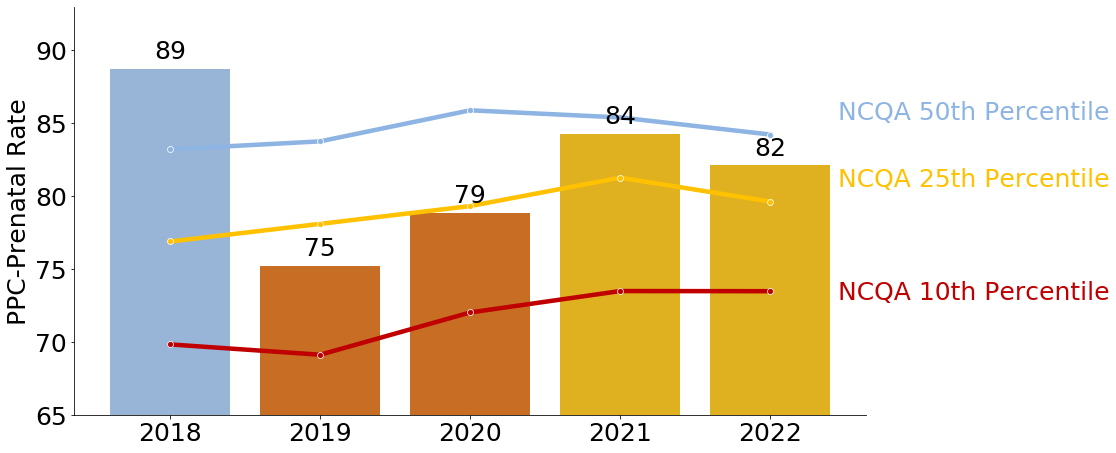

In [99]:
##########################
#'PPC pre from 2018 to 2022'
##########################
file_path5 = '/Users/tigershao/Dropbox (UFL)/Forum Slides Making Project/data/admin data/hybrid_data_PPC.csv'
hybrid_ppc = pd.read_csv(file_path5)

ppc_pre = hybrid_ppc[(hybrid_ppc['MeasureNameAbbreviation'] == 'PPC') &
                               (hybrid_ppc['PopulationName'] == 'ALL') &
                               (hybrid_ppc['SubmeasureName'] == 'Timeliness of prenatal care')]

filtered_national_ppcpre = national_level_all[
    (national_level_all['MeasureNameAbbreviation'] == 'PPC') &
    (national_level_all['MeasureName'].str.contains('Prenatal and Postpartum Care - Timeliness of Prenatal Care', case=False, na=False))
]


#plot_state_vs_national(ppc_pre, filtered_national_ppcpre,0, 100)
plot_state_vs_national_modified(ppc_pre, filtered_national_ppcpre, 65, 93, "PPC-Prenatal Rate", "", -0.6)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

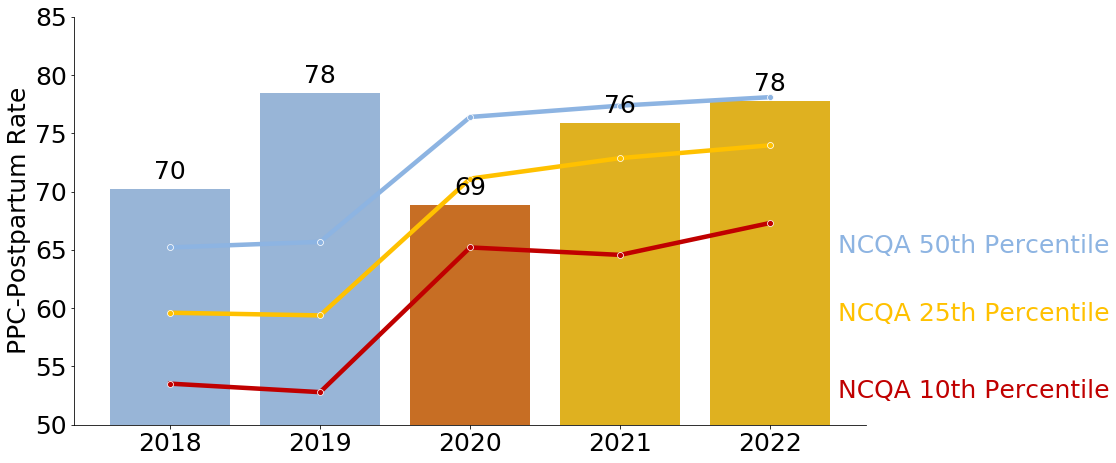

In [135]:
##########################
#'PPC post from 2018 to 2022'
##########################
file_path5 = '/Users/tigershao/Dropbox (UFL)/Forum Slides Making Project/data/admin data/hybrid_data_PPC.csv'
hybrid_ppc = pd.read_csv(file_path5)

ppc_post = hybrid_ppc[(hybrid_ppc['MeasureNameAbbreviation'] == 'PPC') &
                               (hybrid_ppc['PopulationName'] == 'ALL') &
                               (hybrid_ppc['SubmeasureName'] == 'Postpartum care')]

filtered_national_ppcpost = national_level_all[
    (national_level_all['MeasureNameAbbreviation'] == 'PPC') &
    (national_level_all['MeasureName'].str.contains('Prenatal and Postpartum Care - Postpartum care', case=False, na=False))
]


plot_state_vs_national_modified(ppc_post, filtered_national_ppcpost, 50, 85, "PPC-Postpartum Rate", "", -0.5)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


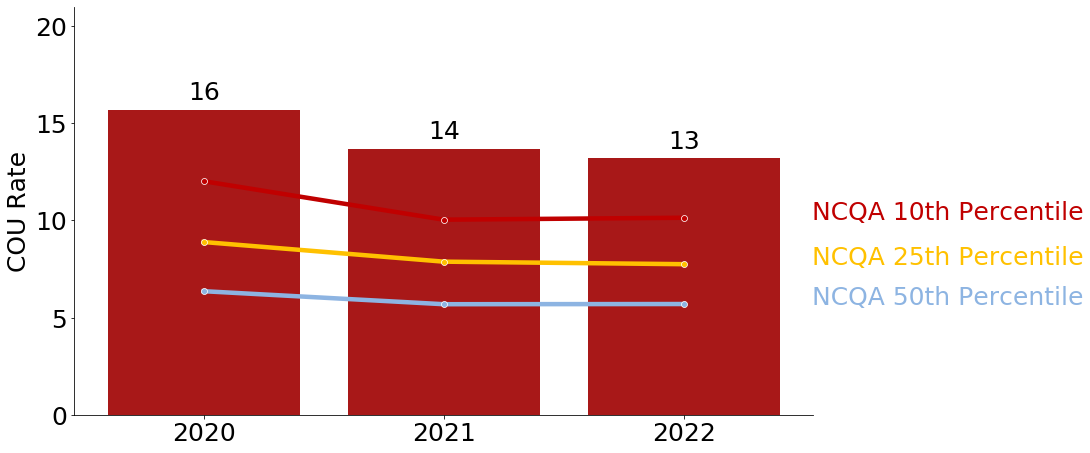

In [129]:
##########################
#'COU >= 15 days from 2018 to 2022'
# Note: since COU's percentile is having strange percentile, we need to manually set this. 
##########################

filtered_data_cou = hedis_sp_all[(hedis_sp_all['MeasureNameAbbreviation'] == 'COU') &
                               (hedis_sp_all['PopulationName'] == 'ALL') &
                               (hedis_sp_all['SubmeasureName'] == 'Total members have >=15 days coverage')
                                ]

filtered_data_cou = filtered_data_cou[filtered_data_cou['year'].isin([2020, 2021, 2022])]

filtered_national_cou = national_level_all[(national_level_all['MeasureNameAbbreviation'] == 'COU') &
                                           (national_level_all['MeasureName']=='Risk of Continued Opioid Use - >=15 Days (Total)')
]


####### plotting ######

filtered_data_cou['year'] = filtered_data_cou['year'].astype(str)
filtered_national_cou['year'] = filtered_national_cou['year'].astype(str)

    # Set global font size
plt.rcParams.update({'font.size': 25})

    # Adjust plot scale size, and panel color
plt.figure(figsize=(16, 7), facecolor='white')

    # Determine the color for each state rate based on the national percentiles
filtered_data_cou['color'] = '#C00000'

    # Plot the state data as bars with the assigned color
barplot = sns.barplot(data=filtered_data_cou, x='year', y='rate', palette=filtered_data_cou['color'], ci=None)
    
    # Add bar labels for each bar
for bar in barplot.patches:
        barplot.annotate(format(bar.get_height(), '.0f'),
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='bottom',
                         textcoords="offset points",
                         xytext=(0,5),
                         fontsize=25)

    # Plot the national percentile data as lines
sns.lineplot(data=filtered_national_cou, x='year', y='X50thPercentile', marker='o', color='#8DB4E2', label='', linewidth=4.5)
sns.lineplot(data=filtered_national_cou, x='year', y='X25thPercentile', marker='o', color='#FFC100', label='', linewidth=4.5)
sns.lineplot(data=filtered_national_cou, x='year', y='X10thPercentile', marker='o', color='#C00000', label='', linewidth=4.5)
    
    # Add text labels for the 10th, 25th, and 50th percentiles
    # Example for adding labels, adjust 'year' and 'percentile_value' as needed
plt.text(2.5, filtered_national_cou['X10thPercentile'].min()+0, ' NCQA 10th Percentile', fontsize=25, color='#C00000')
plt.text(2.5, filtered_national_cou['X25thPercentile'].min()+0, ' NCQA 25th Percentile', fontsize=25, color='#FFC100')
plt.text(2.5, filtered_national_cou['X50thPercentile'].min()+0, ' NCQA 50th Percentile', fontsize=25, color='#8DB4E2')

    # Set additional plot parameters
plt.title('')
plt.xlabel('')
plt.ylabel('COU Rate')
plt.grid(False)
plt.tight_layout()
plt.ylim(0, 21)
sns.despine()
    
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

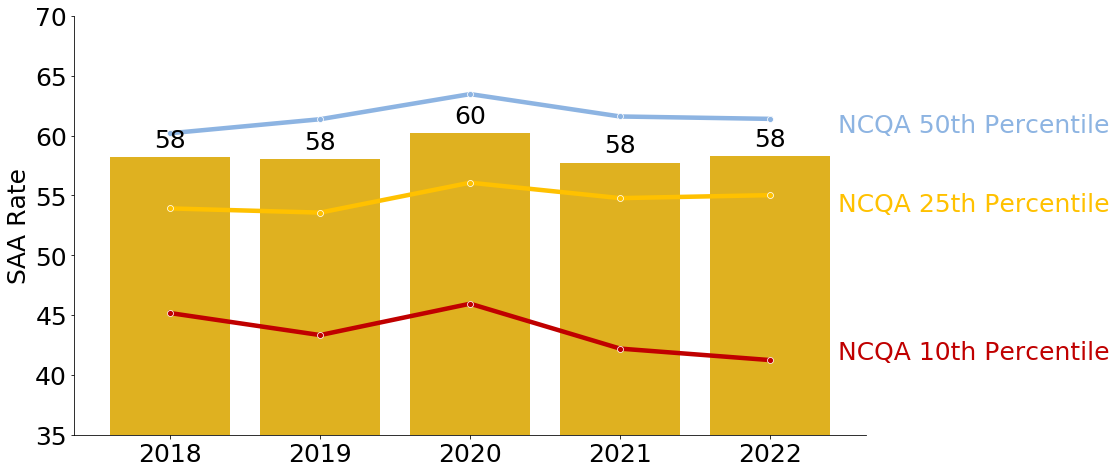

In [105]:
##########################
#'SAA from 2018 to 2022'
##########################

filtered_data_saa = hedis_sp_all[(hedis_sp_all['MeasureNameAbbreviation'] == 'SAA') &
                               (hedis_sp_all['PopulationName'] == 'ALL') &
                               ((hedis_sp_all['SubmeasureName'] == 'Non-Medicare 80% Coverage') |
                               (hedis_sp_all['SubmeasureName'] == '80% Coverage'))
                               ]

filtered_national_saa = national_level_all[
    (national_level_all['MeasureNameAbbreviation'] == 'SAA') &
    (national_level_all['MeasureName'] == 'Adherence to Antipsychotic Medications for Individuals With Schizophrenia')]



#plot_state_vs_national(filtered_data_saa, filtered_national_saa, 30, 80)

plot_state_vs_national_modified(filtered_data_saa, filtered_national_saa, 35, 70, "SAA Rate", "", 0.1)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

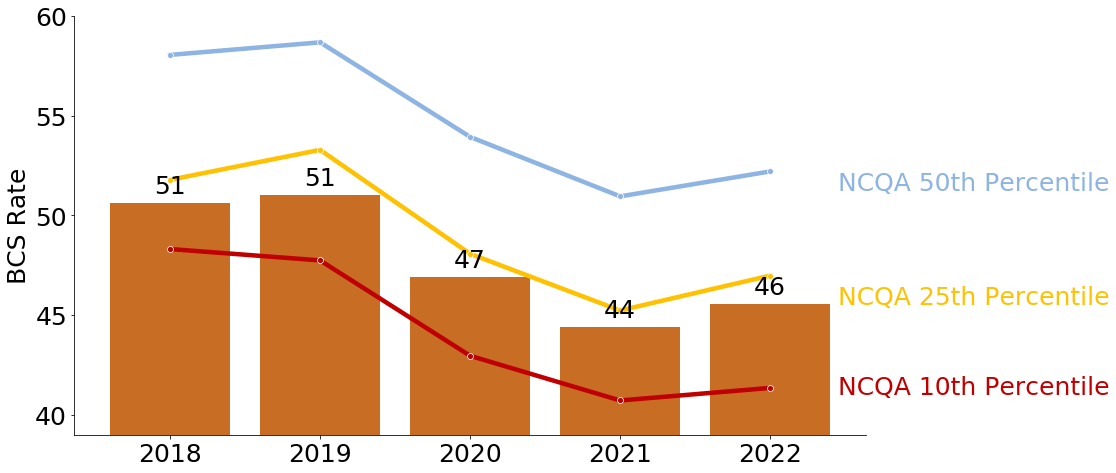

In [125]:
##########################
#'BCS from 2018 to 2022'
##########################

filtered_data_bcs = hedis_sp_all[(hedis_sp_all['MeasureNameAbbreviation'] == 'BCS') &
                               (hedis_sp_all['PopulationName'] == 'ALL') &
                               (hedis_sp_all['SubmeasureName'] == 'Non-Medicare Total')]

filtered_national_bcs = national_level_all[(national_level_all['MeasureNameAbbreviation'] == 'BCS') &
                                           (national_level_all['MeasureName']=='Breast Cancer Screening')
]


#plot_state_vs_national(filtered_data_bcs, filtered_national_bcs, 40, 60)

plot_state_vs_national_modified(filtered_data_bcs, filtered_national_bcs, 39, 60, "BCS Rate", "", 0.3)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

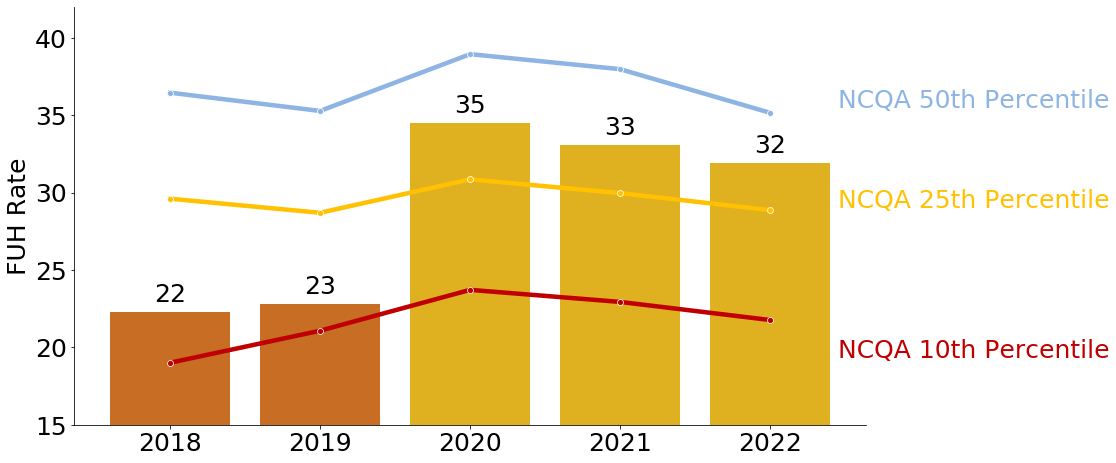

In [108]:
##########################
#'FUH - 7 from 2018 to 2022'
##########################

filtered_data_fuh = hedis_sp_all[(hedis_sp_all['MeasureNameAbbreviation'] == 'FUH') &
                               (hedis_sp_all['PopulationName'] == 'ALL') &
                               (hedis_sp_all['SubmeasureName'] == 'Total Follow Up within 7 Days')]

filtered_national_fuh = national_level_all[
    (national_level_all['MeasureNameAbbreviation'] == 'FUH') &
    ((national_level_all['MeasureName'] == 'Follow-Up After Hospitalization For Mental Illness - 7 days (Total)') |
     (national_level_all['MeasureName'] == 'Follow Up After Hospitalization For Mental Illness - 7 days'))
]



#plot_state_vs_national(filtered_data_fuh, filtered_national_fuh, 0, 60)

plot_state_vs_national_modified(filtered_data_fuh, filtered_national_fuh, 15, 42, "FUH Rate", "", 0.3)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

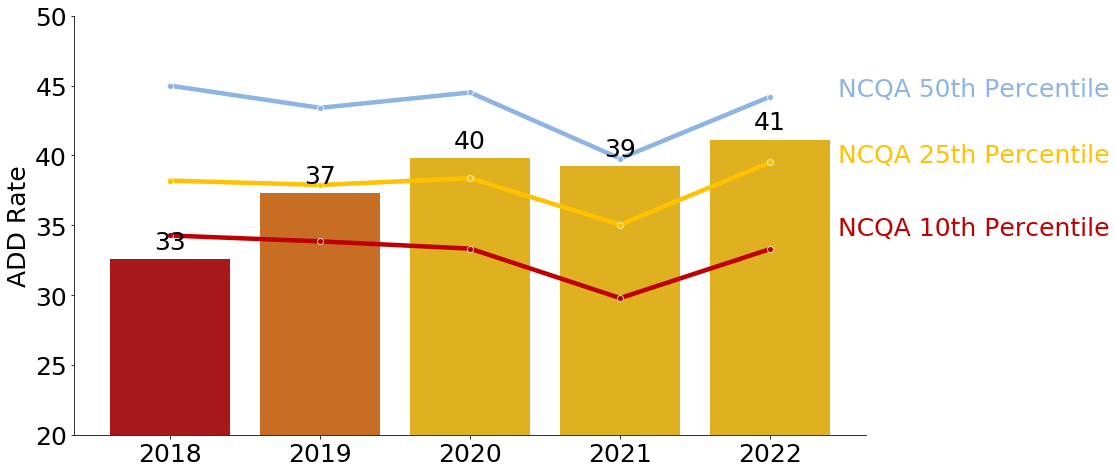

In [114]:
##########################
#'ADD from 2018 to 2022'
##########################

filtered_data_add = hedis_sk_all[(hedis_sk_all['MeasureNameAbbreviation'] == 'ADD') &
                               (hedis_sk_all['PopulationName'] == 'ALL') &
                               (hedis_sk_all['SubmeasureName'] == 'Initiation Phase')
                               ]

filtered_national_add = national_level_all[
    (national_level_all['MeasureNameAbbreviation'] == 'ADD') &
    (national_level_all['MeasureName'] == 'Follow Up Care for Children Prescribed ADHD Medication - Initiation Phase') |
    (national_level_all['MeasureName'] == 'Follow-Up Care for Children Prescribed ADHD Medication - Initiation Phase')
]


#plot_state_vs_national(filtered_data_add, filtered_national_add, 0, 60)

plot_state_vs_national_modified(filtered_data_add, filtered_national_add, 20, 50, "ADD Rate", "", 4.5)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

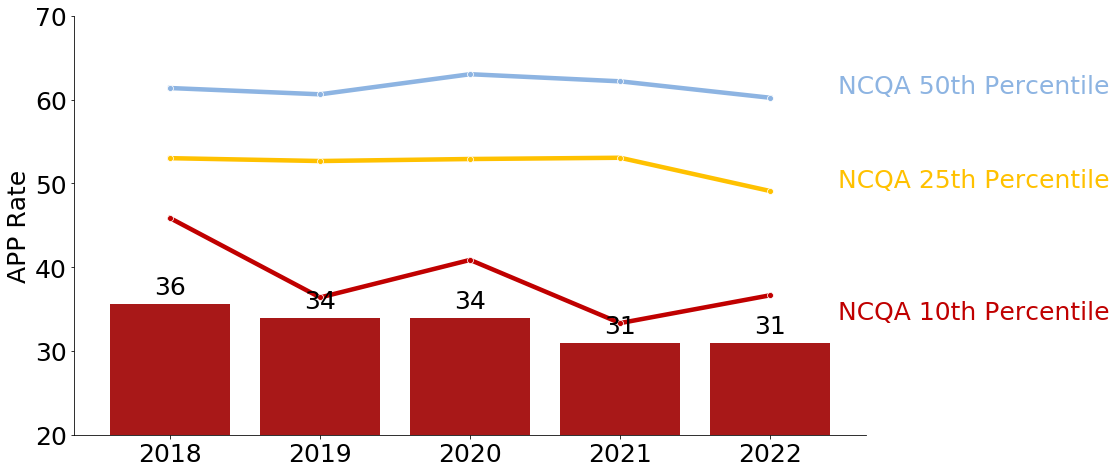

In [115]:
##########################
#'APP from 2018 to 2022'
##########################

filtered_data_app = hedis_sk_all[(hedis_sk_all['MeasureNameAbbreviation'] == 'APP') &
                               (hedis_sk_all['PopulationName'] == 'ALL') &
                               (hedis_sk_all['SubmeasureName'] == 'Total')
                               ]

filtered_national_app = national_level_all[
    (national_level_all['MeasureNameAbbreviation'] == 'APP') &
    (national_level_all['MeasureName'] == 'Use of First-Line Psychosocial Care for Children and Adolescents on Antipsychotics (Total)') 
]


#plot_state_vs_national(filtered_data_app, filtered_national_app, 20, 80)

plot_state_vs_national_modified(filtered_data_app, filtered_national_app, 20, 70, "APP Rate", "", 0.5)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

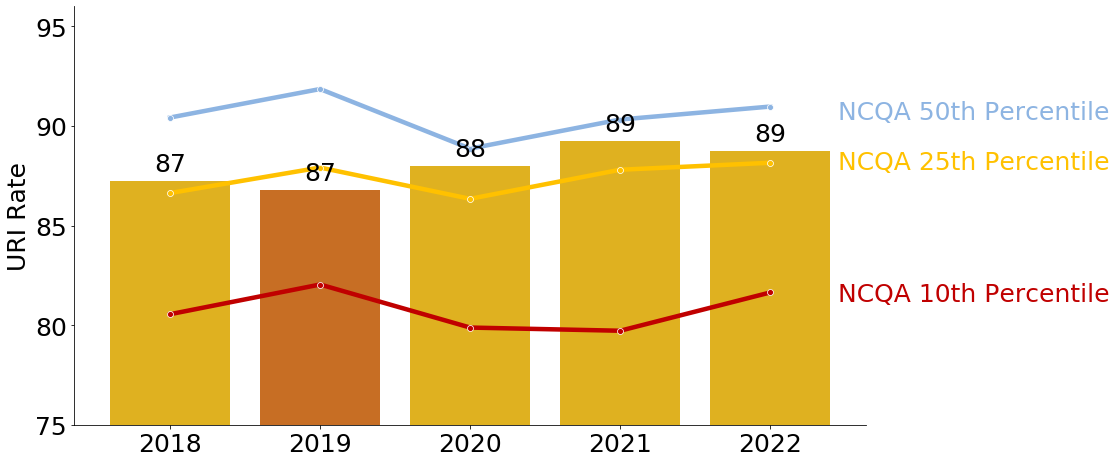

In [130]:
##########################
#'URI from 2018 to 2022'
# Note that URI have 2 rate - Rate and Reported Rate. 
##########################

filtered_data_uri = hedis_sk_all[(hedis_sk_all['MeasureNameAbbreviation'] == 'URI') &
                               (hedis_sk_all['PopulationName'] == 'ALL') &
                               (hedis_sk_all['SubmeasureName'] == 'Total')
                               ]

filtered_data_uri['rate'] = 100 - filtered_data_uri['rate']

filtered_national_uri = national_level_all[
    (national_level_all['MeasureNameAbbreviation'] == 'URI') &
    (national_level_all['MeasureName'] == 'Appropriate Treatment for Children With Upper Respiratory Infection') |
    (national_level_all['MeasureName'] == 'Appropriate Treatment for Upper Respiratory Infection (Total)')
]


#plot_state_vs_national(filtered_data_uri, filtered_national_uri, 60, 100, "URI")

plot_state_vs_national_modified(filtered_data_uri, filtered_national_uri, 75, 96, "URI Rate", "", 1.5)



In [133]:
filtered_data_cou.head()


,Measurename,SubmeasureName,PopulationName,PopulationName1,Numer,Denom,rate,PlanCodes,MeasureNameAbbreviation,year,color
40425,Risk Opioid Use MY20 (COUMY20),Total members have >=15 days coverage,ALL,ALL,4556,29041,15.69,ALL,COU,2020,#C00000
55468,Risk Opioid Use MY21 (COUMY21),Total members have >=15 days coverage,ALL,ALL,3716,27138,13.69,ALL,COU,2021,#C00000
72657,Risk Opioid Use MY22 (COUMY22),Total members have >=15 days coverage,ALL,ALL,3585,27190,13.19,ALL,COU,2022,#C00000
